# Decision Tree (Classification)

Data Source: [Fertility]("https://archive.ics.uci.edu/ml/datasets/Fertility")

**Attributes**

- Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)
- Age at the time of analysis. 18-36 (0, 1)
- Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)
- Accident or serious trauma 1) yes, 2) no. (0, 1)
- Surgical intervention 1) yes, 2) no. (0, 1)
- High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)
- Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)
- Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)
- Number of hours spent sitting per day ene-16 (0, 1)
- Output: Diagnosis normal (N), altered (O) 

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
fertility = pd.read_csv("./fertility/fertility_Diagnosis.txt")
fertility.head()

,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88,N
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [3]:
# Convert the dataset into .csv
fertility.to_csv("./fertility/fertility.csv", index = None)

In [4]:
# Load the .csv format of dataset
fertility_diag = pd.read_csv("./fertility/fertility.csv")
fertility_diag.head()

,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88,N
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [5]:
# Rename the headers as per the data source
fertility_diag.columns = ["season", "age", "child_disease", "accident", "surgical", "highfever",
                    "freq_alcohol", "smoking", "hours", "diagnosis"]
fertility_diag.head()

,season,age,child_disease,accident,surgical,highfever,freq_alcohol,smoking,hours,diagnosis
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [6]:
# Display the characteristics of the dataset
print("Dimension of the dataset is: ", fertility_diag.shape)
print("The variables present in dataset are: \n", fertility_diag.columns)

Dimension of the dataset is:  (99, 10)
The variables present in dataset are: 
 Index(['season', 'age', 'child_disease', 'accident', 'surgical', 'highfever',
       'freq_alcohol', 'smoking', 'hours', 'diagnosis'],
      dtype='object')


In [7]:
# Using random seed function to generate the same dataset
np.random.seed(3000)

In [8]:
# Train-Test Split for both independent and dependent features
training, test = train_test_split(fertility_diag, test_size = 0.3)

x_trg = training.drop("diagnosis", axis = 1)
y_trg = training["diagnosis"]

x_test = test.drop("diagnosis", axis = 1)
y_test = test["diagnosis"]

In [9]:
x_trg.shape

(69, 9)

In [10]:
y_trg.shape

(69,)

In [11]:
x_test.shape

(30, 9)

In [12]:
y_test.shape

(30,)

### Model Building - Decision Tree

In [13]:
# Model building
tree_fertility = DecisionTreeClassifier(random_state = 0)

# Fit the model
tree_fertility.fit(x_trg, y_trg)
print("Accuracy on training set is: %0.3f" % tree_fertility.score(x_trg, y_trg))
print("Accuracy on test set is: %0.3f" % tree_fertility.score(x_test, y_test))

Accuracy on training set is: 0.986
Accuracy on test set is: 0.800


In [14]:
# Confusion Matrix - Decision Tree
tree_pred = tree_fertility.predict(x_test)
tree_results = confusion_matrix(y_test, tree_pred)
print("The confusion matrix of Decision Tree model is: \n", tree_results)

The confusion matrix of Decision Tree model is: 
 [[24  5]
 [ 1  0]]


#### Creating a new Decision Tree with specified depth

In [15]:
# Model Building - new Decision Tree
tree_fertility_1 = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Fit the new model
tree_fertility_1.fit(x_trg, y_trg)
print("Accuracy of new model on Training set is: %03.f" % tree_fertility_1.score(x_trg, y_trg))
print("Accuracy of new model on Test set is: %03f" % tree_fertility_1.score(x_test, y_test))

Accuracy of new model on Training set is: 001
Accuracy of new model on Test set is: 0.800000


In [16]:
# Display the Decision Tree model
export_graphviz(tree_fertility_1, out_file = "./fertility/fertility_1.dot", class_names = ["N", "O"],
               feature_names = x_trg.columns, impurity = False, filled = True)

with open("./fertility/fertility_1.dot") as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

In [17]:
# Determine the importance of each predictor variable
print("The importance of the features of tree model is: \n", tree_fertility_1.feature_importances_)

The importance of the features of tree model is: 
 [0.27417006 0.31618512 0.         0.29869832 0.         0.03944765
 0.         0.         0.07149886]


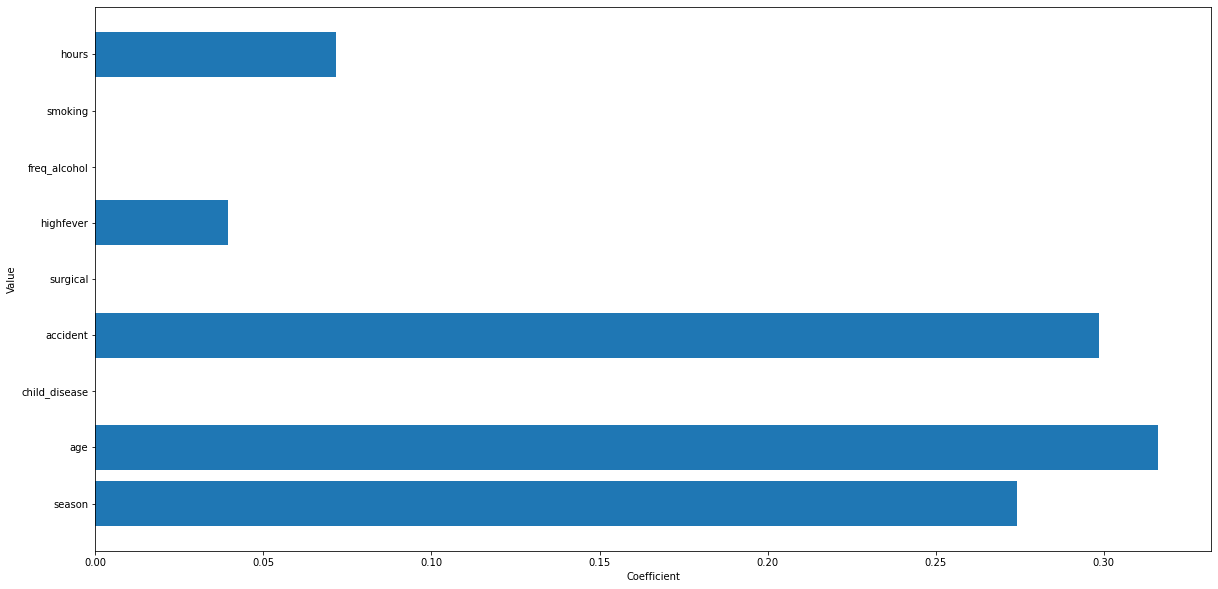

In [18]:
# Display the importance of each variable in decision tree
plt.figure(1, figsize = (20,10))
plt.yticks(range(0,9), x_trg.columns)
plt.barh(range(0,9), tree_fertility_1.feature_importances_, align = "center")
plt.xlabel("Coefficient")
plt.ylabel("Value")
plt.show()

In [19]:
# Creating confusion matrix and determine accuracy of the new decison tree model
tree_pred_2 = tree_fertility_1.predict(x_test)
tree_acc_score_2 = accuracy_score(y_test, tree_pred_2)
tree_results_2 = confusion_matrix(y_test, tree_pred_2)
print("The accuracy of new Decision Tree model is: %0.3f" % tree_acc_score_2)
print("The confusion matrix of new Decision Tree model is: \n", tree_results_2)

The accuracy of new Decision Tree model is: 0.800
The confusion matrix of new Decision Tree model is: 
 [[24  5]
 [ 1  0]]


### Creating a new Decision Tree model with important predictor variables

In [20]:
# Model Building - Decision Tree new
x_trg = x_trg.drop(columns = ["smoking", "age", "surgical", "accident", "child_disease",
                            "highfever"], axis = 1)
x_test = x_test.drop(columns = ["smoking", "age", "surgical", "accident", "child_disease",
                            "highfever"], axis = 1)

In [21]:
# New DT Model
tree_fertility_2 = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Model Fit
tree_fertility_2.fit(x_trg, y_trg)

# Prediction
tree_fertility_2_pred = tree_fertility_2.predict(x_test)

# Accuracy score
tree_fertility_2_acc_score = accuracy_score(y_test, tree_fertility_2_pred)

# Confusion Matrix
tree_fertility_2_results = confusion_matrix(y_test, tree_fertility_2_pred)

print("The accuracy of 3rd DT model is: %0.3f" % tree_fertility_2_acc_score)
print("The consufion matrix of 3rd DT model is: \n", tree_fertility_2_results)

The accuracy of 3rd DT model is: 0.933
The consufion matrix of 3rd DT model is: 
 [[28  1]
 [ 1  0]]


### Compare DT models with k-NN model

In [22]:
# Model Building - k-NN
knn_accuracylist = []
for K in range(21):
    K = K + 1
    # Model building
    knn_fertility = KNeighborsClassifier(n_neighbors = K)
    
    # Model fit
    knn_fertility.fit(x_trg, y_trg)
    
    # Prediction
    knn_pred = knn_fertility.predict(x_test)
    
    # Consfusion matrix
    knn_results = confusion_matrix(y_test, knn_pred)
    
    # Accuracy of model
    knn_score = accuracy_score(y_test, knn_pred)
    
    print("The accuracy of the kNN model is: %0.3f" %knn_score)
    print("The confusion matrix of kNN model is: \n", knn_results)
    
    knn_accuracylist.append(knn_score)

print("\n")
print("The maximum accuracy of kNN model is: %0.3f" % max(knn_accuracylist))

The accuracy of the kNN model is: 0.833
The confusion matrix of kNN model is: 
 [[25  4]
 [ 1  0]]
The accuracy of the kNN model is: 0.900
The confusion matrix of kNN model is: 
 [[27  2]
 [ 1  0]]
The accuracy of the kNN model is: 0.900
The confusion matrix of kNN model is: 
 [[27  2]
 [ 1  0]]
The accuracy of the kNN model is: 0.900
The confusion matrix of kNN model is: 
 [[27  2]
 [ 1  0]]
The accuracy of the kNN model is: 0.867
The confusion matrix of kNN model is: 
 [[26  3]
 [ 1  0]]
The accuracy of the kNN model is: 0.900
The confusion matrix of kNN model is: 
 [[27  2]
 [ 1  0]]
The accuracy of the kNN model is: 0.900
The confusion matrix of kNN model is: 
 [[27  2]
 [ 1  0]]
The accuracy of the kNN model is: 0.967
The confusion matrix of kNN model is: 
 [[29  0]
 [ 1  0]]
The accuracy of the kNN model is: 0.967
The confusion matrix of kNN model is: 
 [[29  0]
 [ 1  0]]
The accuracy of the kNN model is: 0.967
The confusion matrix of kNN model is: 
 [[29  0]
 [ 1  0]]
The accura

### Compare DT model with Naive Bayes model

In [23]:
# Model building - Naive Bayes
naive_fertility = GaussianNB()

# Model fit
naive_fertility.fit(x_trg, y_trg)

# Prediction
naive_pred = naive_fertility.predict(x_test)

# Confusion matrix
naive_results = confusion_matrix(y_test, naive_pred)

# Accuracy score
naive_acc_score = accuracy_score(y_test, naive_pred)

print("The accuracy of Naiva Bayes model is: %0.3f" % naive_acc_score)
print("The confusion matrix of Naive Bayes model is: \n", naive_results)

The accuracy of Naiva Bayes model is: 0.933
The confusion matrix of Naive Bayes model is: 
 [[28  1]
 [ 1  0]]


### Compare DT model with Logistic Regression model

In [24]:
# Model building - Logistic Regression
log_fertility = LogisticRegression()

# Model fit
log_fertility.fit(x_trg, y_trg)

# Prediction
log_pred = log_fertility.predict(x_test)

# Accuracy of the model
log_acc_score = accuracy_score(y_test, log_pred)

# Confuson Matrix of model
log_results = confusion_matrix(y_test, log_pred)

print("The accuracy of Logistic Regression model is: %0.3f" % log_acc_score)
print("The confusion matrix of Logistic Regression model is: \n", log_results)

The accuracy of Logistic Regression model is: 0.967
The confusion matrix of Logistic Regression model is: 
 [[29  0]
 [ 1  0]]


It can be seen that when basic version of DT model created with random_state = 0 and maxi_depth kept as default. The peformance of model on training set is 0.986 and on test set is 0.800. The huge difference indicates that model is underfitting.

Upon trying to improve the accuracy by chaning parameters max_depth to 3, we found that the preformance of model haven't improved on test set, it remained 0.800.

Upon considering the important predictor variables a new DT model was built and accuracy is improved to 0.933.

We have also compared the DT models with other models and found out that the maximum accuracy of kNN model is 0.967 and that of Naive Bayes is 0.933 and at last Logistic Regression model is 0.967.

Upon checking the performances of aforementioned models, the best models can be either kNN or Logistic Regression.